In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("100_sales.csv")

In [3]:
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50,NaN,NaN
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36,NaN,NaN
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75,NaN,NaN
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82,NaN,NaN
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,Online,M,09/03/2011,35.84,97040.64,65214.72,NaN,NaN
96,Asia,Malaysia,Fruits,Offline,L,28/12/2011,6.92,58471.11,15103.47,NaN,NaN
97,Sub_Saharan Africa,Sierra Leone,Vegetables,Offline,C,29/06/2016,90.93,228779.10,93748.05,NaN,NaN
98,North America,Mexico,Personal Care,Offline,M,08/08/2015,56.67,471336.91,144521.02,NaN,NaN


In [4]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

In [5]:
df_grouped = df.groupby('Ship_Date')['Total_Revenue'].sum().reset_index()

In [6]:
dates = df_grouped['Ship_Date']
revenues = df_grouped['Total_Revenue']

99 99
0   2010-01-08
1   2010-02-25
2   2010-03-18
3   2010-06-27
4   2010-10-05
Name: Ship_Date, dtype: datetime64[ns]
0    1082418.40
1    3162704.80
2     247956.32
3    2533654.00
4      54319.26
Name: Total_Revenue, dtype: float64


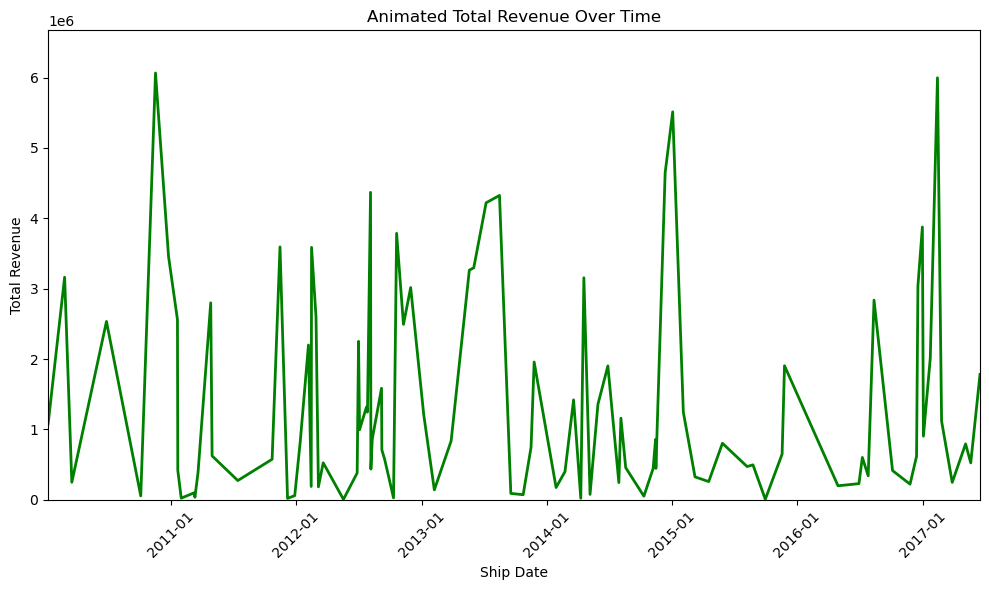

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_title("Animated Total Revenue Over Time")
ax.set_xlabel("Ship Date")
ax.set_ylabel("Total Revenue")


ax.set_xlim(dates.min(), dates.max())
ax.set_ylim(0, revenues.max() * 1.1) 


line, = ax.plot([], [], 'g-', linewidth=2)


def init():
    line.set_data([], [])
    return line,

def update(frame):
    x = dates[:frame]
    y = revenues[:frame]
    line.set_data(x, y)
    return line,

print(len(dates), len(revenues))
print(dates.head())
print(revenues.head())

ani = animation.FuncAnimation(
    fig, update, frames=range(1, len(dates) + 1),
    init_func=init, blit=True, interval=100
)
from IPython.display import HTML
HTML(ani.to_jshtml())


plt.xticks(rotation=45)
plt.tight_layout()

plt.show()